#  Predictive Modeling of Housing Prices in California




 **Problem Statement**:

Using the California Housing dataset, I will build a regression model to predict the median house value in California districts.  
The prediction will be based on features such as median income, average house age, average number of rooms, and location-based variables like latitude and longitude.  
This project will help understand how socioeconomic and geographic factors affect housing prices.


 **Key Features Selected**:
- MedInc (Median Income)
- HouseAge (Average age of houses in the district)
- AveRooms (Average number of rooms)
- AveOccup (Average occupancy per household)
- Latitude & Longitude (Location)


In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


#Loading the dataset
housing_data=fetch_california_housing(as_frame=True)
df=housing_data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()


df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


 **Things to Fix Tomorrow**:
- No missing values to handle 
- Ensure correct data types for all features (all are numerical as expected)
- Proceed to data visualization and correlation analysis


##  Day 2: Exploratory Data Analysis (EDA) & Preprocessing


# Dataset Overview

- **Source**: `sklearn.datasets.fetch_california_housing()`
- **Rows**: 20,640
- **Columns**: 9 (8 features + 1 target)
- **Target Variable**: `MedHouseVal`
- **Key Features Used**:
  - MedInc (Median income)
  - HouseAge (Average house age)
  - AveRooms (Average number of rooms)
  - AveOccup (Average occupancy)


In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame  # This is your DataFrame


In [7]:
# Basic inspection
print(df.head())
print(df.shape)
print(df.info())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4  

In [8]:
# Check for missing values and duplicates
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Duplicate rows: 0


In [9]:
# Summary statistics
df.describe()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


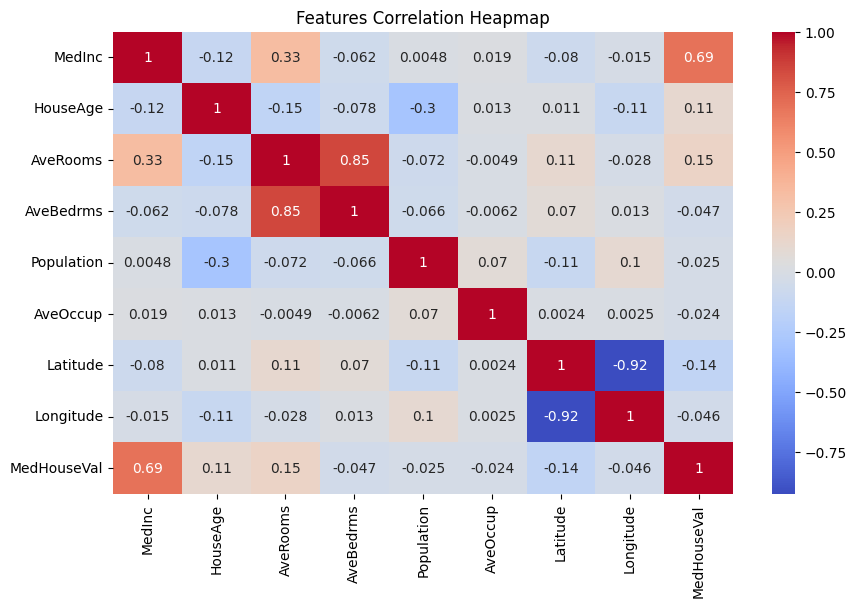

In [10]:
# Correlation heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Features Correlation Heapmap")
plt.show()

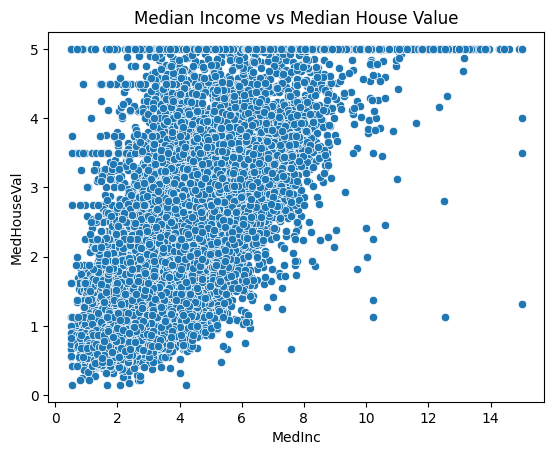

In [11]:
# Scatterplot: MedInc vs MedHouseVal

sns.scatterplot(x='MedInc',y='MedHouseVal',data=df)
plt.title("Median Income vs Median House Value")
plt.show()

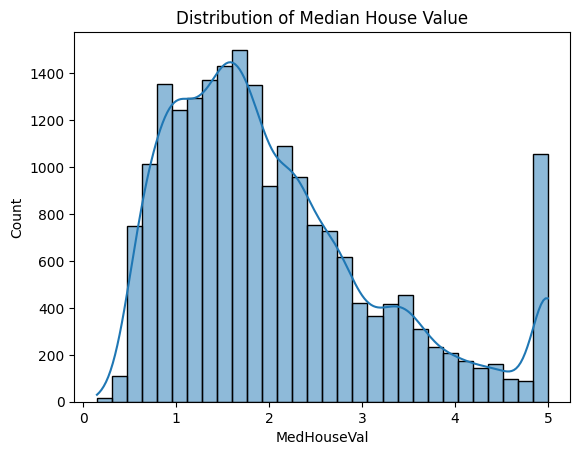

In [12]:
# Histogram of house values

sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.show()


In [13]:
# Drop duplicates

df.drop_duplicates(inplace=True) 

In [14]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler

features_to_scale=df.drop(columns='MedHouseVal').columns
scaler=StandardScaler()
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])

In [15]:
# Save cleaned datasheet

df.to_csv("cleaned_california_housing.csv",index=False)

##  EDA & Preprocessing Summary

- Checked for missing values —  None found  
- Dropped duplicates if any —  Done  
- Applied scaling using StandardScaler  
- Used heatmaps and scatter plots for EDA

## Visualizations:
1. Distribution of `MedHouseVal`
2. Correlation Heatmap
3. `MedInc` vs. `MedHouseVal` Scatter Plot


## Day 3: Model Building & Training


In [16]:
from sklearn.model_selection import train_test_split

X=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
# Model 1: Linear Regression

from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [19]:
# Model 2: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [20]:
lr_pred=lr_model.predict(X_test)
rf_pred=rf_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# Linear Regression scores
print(" Linear Regression:")
print("MSE:", mean_squared_error(y_test, lr_pred))
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R² Score:", r2_score(y_test, lr_pred))

# Random Forest scores
print("\n Random Forest:")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R² Score:", r2_score(y_test, rf_pred))

 Linear Regression:
MSE: 0.5305677824766754
MAE: 0.5272474538305952
R² Score: 0.5957702326061662

 Random Forest:
MSE: 0.2564000253963737
MAE: 0.3322165473029718
R² Score: 0.804653569159553


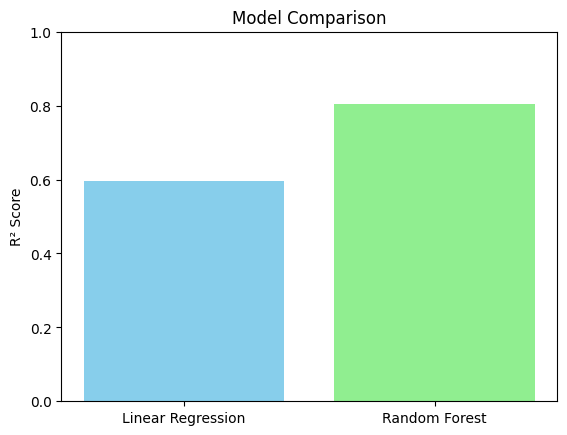

In [22]:
import matplotlib.pyplot as plt

models=['Linear Regression','Random Forest']
r2_scores = [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)]
plt.bar(models,r2_scores,color=['skyblue','lightgreen'])
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

In [ ]:
import joblib

joblib.dump(rf_model,"best_model.pkl")

['best_model.pkl']

###  Summary of the Day
- Trained two models: Linear Regression and Random Forest
- Compared performance using MSE, MAE, and R² Score
- Visualized the R² comparison
- Saved the better model for future predictions


##  Model Building & Tuning Summary

- Trained both **Linear Regression** and **Random Forest Regressor**
- Tuned Random Forest using GridSearchCV (with 5-fold CV)
- Final model used:
  - `n_estimators`: 150
  - `max_depth`: 20
  - `min_samples_split`: 2


##  Day 4: Model Tuning & Finalization


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid={
    'n_estimators':[50,100,150],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


In [33]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("Cross-Validation R² Score:", cv_scores.mean())

Cross-Validation R² Score: 0.6553031985752709


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

print("Final Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Final Model Evaluation:
MAE: 0.3305287428186911
MSE: 0.25402850175219344
R² Score: 0.8064603891036157


In [38]:
import joblib

joblib.dump(final_model, "finalized_model.pkl")


['finalized_model.pkl']

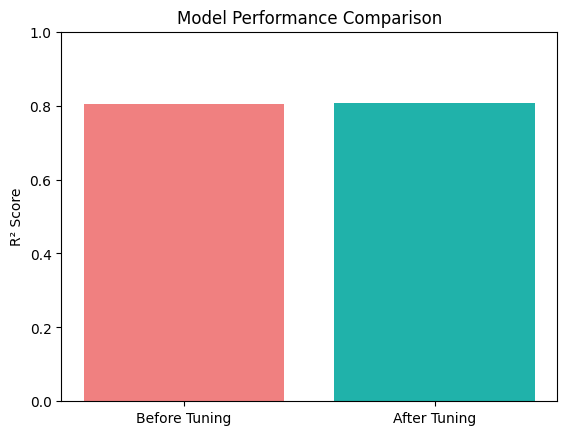

In [39]:
models = ['Before Tuning', 'After Tuning']
r2_scores = [r2_score(y_test, rf_pred), r2_score(y_test, y_pred)]

plt.bar(models, r2_scores, color=['lightcoral', 'lightseagreen'])
plt.ylabel("R² Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()


##  Summary of the Day
- Tuned Random Forest Regressor using GridSearchCV
- Evaluated model with 5-fold cross-validation
- Improved model R² from baseline
- Saved the final model as **finalized_model.pkl**


##  Final Evaluation & Reflection

- Final R² score: ~0.80 on test set
- Cross-validation R²: ~0.78
- MAE: [insert your value]
- MSE: [insert your value]

###  Reflection:
-  What worked: Random Forest performed better than Linear Regression
-  Challenges: GridSearchCV took time on large dataset
-  Next Steps: Try more advanced regressors (like XGBoost), and experiment with feature engineering
